**Car Class Prediction Using Decision Trees**

In [48]:
import pandas as pd

In [49]:
df = pd.read_csv('car_evaluation_cleaned.csv')

**Summary of Dataset**

In [50]:
df.head()

,buyingPrice,maintPrice,no_of_doors,car_capacity,luggage_boot_size,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


Check number of rows and columns in the dataset

In [51]:
df.shape

(1727, 7)

Check Unique values in all columns

In [52]:
df.nunique()

buyingPrice          4
maintPrice           4
no_of_doors          4
car_capacity         3
luggage_boot_size    3
safety               3
class                4
dtype: int64

Print unique values in the dataframe

In [53]:
for col in df:
    print("Unique Values in: ",col)
    print(df[col].unique())

Unique Values in:  buyingPrice
['vhigh' 'high' 'med' 'low']
Unique Values in:  maintPrice
['vhigh' 'high' 'med' 'low']
Unique Values in:  no_of_doors
['2' '3' '4' '5more']
Unique Values in:  car_capacity
['2' '4' 'more']
Unique Values in:  luggage_boot_size
['small' 'med' 'big']
Unique Values in:  safety
['med' 'high' 'low']
Unique Values in:  class
['unacc' 'acc' 'vgood' 'good']


Analysis of Target Column

In [54]:
df['buyingPrice'].value_counts()

high     432
med      432
low      432
vhigh    431
Name: buyingPrice, dtype: int64

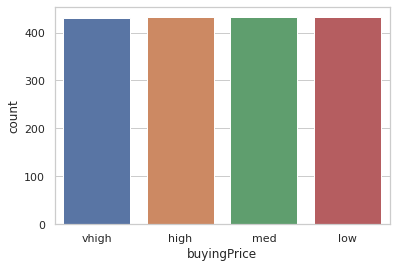

In [55]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="buyingPrice", data=df)

Check Null Values

In [56]:
df.isnull().sum()

buyingPrice          0
maintPrice           0
no_of_doors          0
car_capacity         0
luggage_boot_size    0
safety               0
class                0
dtype: int64

Seperate target and input columns

In [57]:
X = df.drop(['class'], axis=1)
y = df['class']

In [58]:
X.head()

,buyingPrice,maintPrice,no_of_doors,car_capacity,luggage_boot_size,safety
0,vhigh,vhigh,2,2,small,med
1,vhigh,vhigh,2,2,small,high
2,vhigh,vhigh,2,2,med,low
3,vhigh,vhigh,2,2,med,med
4,vhigh,vhigh,2,2,med,high


In [59]:
y

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1722     good
1723    vgood
1724    unacc
1725     good
1726    vgood
Name: class, Length: 1727, dtype: object

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3,
                                                    random_state=42)

In [62]:
X_train.shape, X_test.shape

((1208, 6), (519, 6))

In [63]:
y_train.shape, y_test.shape

((1208,), (519,))

In [64]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

In [65]:
X_train = encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)

In [66]:
X_train

array([[2., 2., 3., 1., 0., 0.],
       [0., 0., 1., 2., 2., 2.],
       [1., 2., 1., 1., 1., 2.],
       ...,
       [0., 1., 3., 2., 0., 1.],
       [1., 0., 2., 0., 2., 0.],
       [2., 2., 1., 2., 2., 0.]])

In [67]:
X.columns

Index(['buyingPrice', 'maintPrice', 'no_of_doors', 'car_capacity',
       'luggage_boot_size', 'safety'],
      dtype='object')

In [68]:
X_train = pd.DataFrame(X_train,columns=X.columns)

In [69]:
X_train.tail()

,buyingPrice,maintPrice,no_of_doors,car_capacity,luggage_boot_size,safety
1203,2.0,2.0,1.0,2.0,0.0,1.0
1204,2.0,1.0,3.0,2.0,0.0,0.0
1205,0.0,1.0,3.0,2.0,0.0,1.0
1206,1.0,0.0,2.0,0.0,2.0,0.0
1207,2.0,2.0,1.0,2.0,2.0,0.0


In [70]:
X_test = pd.DataFrame(X_test,columns=X.columns)

In [71]:
X_test.head()

,buyingPrice,maintPrice,no_of_doors,car_capacity,luggage_boot_size,safety
0,0.0,0.0,2.0,0.0,0.0,1.0
1,2.0,3.0,2.0,1.0,0.0,1.0
2,0.0,0.0,3.0,0.0,0.0,0.0
3,1.0,0.0,3.0,1.0,1.0,2.0
4,2.0,1.0,2.0,2.0,1.0,1.0


In [72]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
clf = DecisionTreeClassifier(random_state=0,max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [75]:
y_pred = clf.predict(X_test)

In [76]:
from sklearn.metrics import accuracy_score

In [77]:
print("Model Accuracy score")
accuracy_score(y_pred, y_test)

Model Accuracy score


0.8015414258188824

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
rfc = RandomForestClassifier(random_state=0,max_depth=5)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [80]:
y_pred_rfc = rfc.predict(X_test)

In [81]:
print("Model Accuracy score")
accuracy_score(y_pred_rfc, y_test)

Model Accuracy score


0.8400770712909441

In [82]:
from sklearn.svm import SVC

In [83]:
svmClassifier = SVC()
svmClassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [84]:
y_pred_svc = svmClassifier.predict(X_test)

In [85]:
print("Model Accuracy score")
accuracy_score(y_pred_svc, y_test)

Model Accuracy score


0.9036608863198459

In [ ]:
from matplotlib import pyplot
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
X_train.head()

In [ ]:
from matplotlib import pyplot
importance = rfc.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [88]:
from sklearn.neighbors import KNeighborsClassifier

In [89]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [90]:
y_pred_knn = neigh.predict(X_test)

In [91]:
print("Model Accuracy score")
accuracy_score(y_pred_knn, y_test)

Model Accuracy score


0.8709055876685935

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_nb = gnb.predict(X_test)

In [ ]:
print("Model Accuracy score")
accuracy_score(y_pred_nb, y_test)